In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads_KNN.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=df.iloc[:,2:4].values   #.values for converting to np array

In [4]:
X.shape

(400, 2)

In [5]:
y=df.iloc[:,-1].values

In [6]:
y.shape

(400,)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
X_train.shape

(320, 2)

In [9]:
# we need to do scaling beacuse estimatedsalary have very large values then age, so have larger impact on that
#need to make them comparable so not have biased impact on distance

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [11]:
X_train[:5,:]

array([[ 1.62540623,  1.63579324],
       [-0.640544  ,  1.43078139],
       [ 0.11477274, -0.29717567],
       [-0.92378778, -0.29717567],
       [ 0.11477274,  1.0793325 ]])

In [12]:
X_test=scaler.transform(X_test)

In [13]:
# k=sqrt(m)
np.sqrt(len(X_train))

17.88854381999832

In [14]:
k=17

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=k)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [17]:
y_pred=knn.predict(X_test)

In [18]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
accuracy_score(y_test,y_pred)

0.9125

In [21]:
confusion_matrix(y_test,y_pred)

array([[51,  5],
       [ 2, 22]])

In [22]:
# trial and error method for k

accuracy=list()
for i in range(1,30):
  knn= KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))

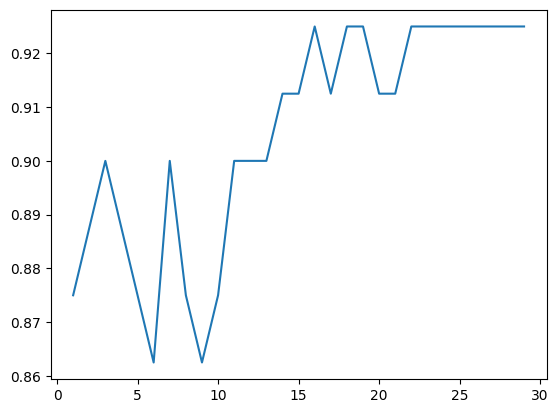

In [23]:
plt.plot(range(1,30),accuracy)

In [24]:
#k=11
knn= KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [41]:
def predict_output():
  age=int(input("enter age"))
  salary=int(input("enter salary"))

  X_new=np.array([age,salary]).reshape(1,-1)
  X_new=scaler.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "will not purchase"
  else:
    return "purchase"

In [42]:
predict_output()

enter age20
enter salary200000


'purchase'

In [43]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#these are hyperparams that we can tune to make our model work better